NB - The sheet works with file with or without the group number at the end of each record

Each record of the file contains:

0 - the ID of the agent transmitting the contagion (for the initial cases, externally generated, the ID has value -1);
    
1 - its contagion progressive number, starting from 1 (for the initial cases, externally generated, this value is 0);

2 - the conventional color of the place where it turned infected, following the NetLogo color swatches (for the externally generated initial cases, this value is 0);

3 - the ID of the agent receiving the contagion;

4 - its fragility rate (1 - robust; 2 - regular; 3 - fragile; 4 - extra fragile);

5 - its contagion progressive number;

6 - the conventional color of the place where it is turning infected, following the NetLogo color swatches;

7 - the day (tick) of the contagion (for the initial cases, externally generated, this value is 0);

8 - the starting infection day, i.e., the previous value plus the *incubationPeriod* (for the externally generated initial cases, the starting infection value is 0);

9 - the day of the conclusion of the infection, i.e., the previous value plus a value between the  *minInfectionDuration* and the *maxInfectionDuration* settings; this period stops if the agent deceases, but we do not consider that possibility here;

10 - the symptomatic (1) or asymptomatic (2) status;

11 - in files produced from April 18th, 2021: the statistical group of the subject as in *contagionSeriesByGroups.ipynb*.

colors https://matplotlib.org/3.3.0/tutorials/colors/colors.html

line styles https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html

In [1]:
import os
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import colors

font = {'size':28}

# chosing a csv file in the current folder
filesHere=os.listdir("./")
selected=[]
for i in range(len(filesHere)):
    if filesHere[i].find('.csv')>0: selected.append(filesHere[i])
selected.sort()
for i in range(len(selected)):
    print (i, selected[i])

0 Experiment_III_05bestGA.csv
1 Experiment_III_05bestGAwithG.csv
2 Experiment_III_05bestGAwithG_list.csv
3 Experiment_III_0bestGA.csv
4 Experiment_III_1bestGA.csv
5 Experiment_III_base.csv
6 Experiment_III_plain_0.csv
7 Experiment_III_plain_05.csv
8 Experiment_III_plain_1.csv
9 Experiment_III_wise_0.csv
10 Experiment_III_wise_05.csv
11 Experiment_III_wise_1.csv
12 Experiment_II_05bestGA.csv
13 Experiment_II_0bestGA.csv
14 Experiment_II_1bestGA.csv
15 Experiment_II_base.csv
16 Experiment_II_plain_0.csv
17 Experiment_II_plain_05.csv
18 Experiment_II_plain_1.csv
19 Experiment_II_wise_0.csv
20 Experiment_II_wise_05.csv
21 Experiment_II_wise_1.csv
22 Experiment_IV_05bestGA.csv
23 Experiment_IV_0bestGA.csv
24 Experiment_IV_1bestGA.csv
25 Experiment_IV_base.csv
26 Experiment_IV_plain_0.csv
27 Experiment_IV_plain_05.csv
28 Experiment_IV_plain_1.csv
29 Experiment_IV_wise_0.csv
30 Experiment_IV_wise_05.csv
31 Experiment_IV_wise_1.csv
32 Experiment_I_05bestGA.csv
33 Experiment_I_05bestGAwithG.csv

In [2]:
num=int(input("Choose a file via its number (>=0;<="+str(len(selected)-1)+" "))
fileName=selected[num]

Choose a file via its number (>=0;<=59 51


In [3]:
rec = genfromtxt(fileName, delimiter=',').astype(np.int64)

### Legenda

<font size = 4 >
black = contagion by an external unidentified agent  
    
<span style="color: gray;">gray = </span>contagion in an empty or open space  
<span style="color: orange;">orange = </span>contagion in a nursing home  
<span style="color: brown;">brown = </span>contagion in a factory/office/shop  
<span style="color: yellow;">yellow = </span>contagion in a school  
<span style="color: cyan;">cyan = </span>contagion at home  
<span style="color: pink;">pink = </span>contagion in a hospital
    
horizontal lines style: incubation (dotted line); symptomatic (solid line);  
                                            asymptomatic (dashed line) 

horizontal lines thickness: robust (lw = 1); regular (lw = 2); fragile (lw = 3); extra-fragile (lw = 4)

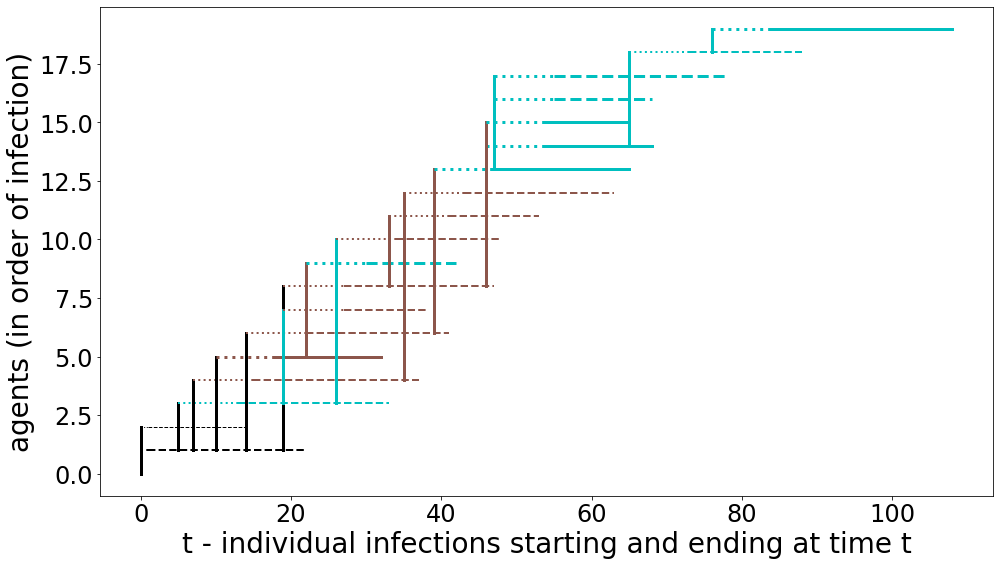

In [4]:
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams["xtick.labelsize"] = 'xx-large'
plt.rcParams["ytick.labelsize"] = 'xx-large'
plt.rcParams["axes.labelsize"] = 'xx-large'
fig=plt.figure()
ax = fig.add_subplot()
ax.set_xlabel("t - individual infections starting and ending at time t",fontdict = font)
ax.set_ylabel("agents (in order of infection)",fontdict = font)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

for i in range(rec.shape[0]):
    #vertical line
    lineS='-'
    plt.plot([rec[i,7],rec[i,7]],[rec[i,1],rec[i,5]],lineS,lw=3,color=colors.color(rec[i,2]))
    #horizontal lines: incubation (dotted line); symptomatic (solid line); 
    #                  asymptomatic (dashed line); 
    lineS=':'
    plt.plot([rec[i,7],rec[i,8]],[rec[i,5],rec[i,5]],lineS,lw=rec[i,4],
                        color=colors.color(rec[i,6]))
    lineS='-'
    if rec[i,10] == 2: lineS='--'
    plt.plot([rec[i,8],rec[i,9]],[rec[i,5],rec[i,5]],lineS,lw=rec[i,4],
                        color=colors.color(rec[i,6]))

## The initial 200 cases

In [5]:
if rec.shape[0] > 200:
  fig=plt.figure()
  ax = fig.add_subplot()
  ax.set_xlabel("t - individual infections starting and ending at time t",fontdict = font)
  ax.set_ylabel("agents (in order of infection)",fontdict = font)
  plt.xticks(fontsize=24)
  plt.yticks(fontsize=24)


  for i in range(200):
    #vertical line
    lineS='-'
    plt.plot([rec[i,7],rec[i,7]],[rec[i,1],rec[i,5]],lineS,lw=3,color=colors.color(rec[i,2]))
    #horizontal lines: incubation (dotted line); symptomatic (solid line); 
    #                  asymptomatic (dashed line); 
    lineS=':'
    plt.plot([rec[i,7],rec[i,8]],[rec[i,5],rec[i,5]],lineS,lw=rec[i,4],
             color=colors.color(rec[i,6]))
    lineS='-'
    if rec[i,10] == 2: lineS='--'
    plt.plot([rec[i,8],rec[i,9]],[rec[i,5],rec[i,5]],lineS,lw=rec[i,4],
             color=colors.color(rec[i,6]))

## After the starting point of vaccinations

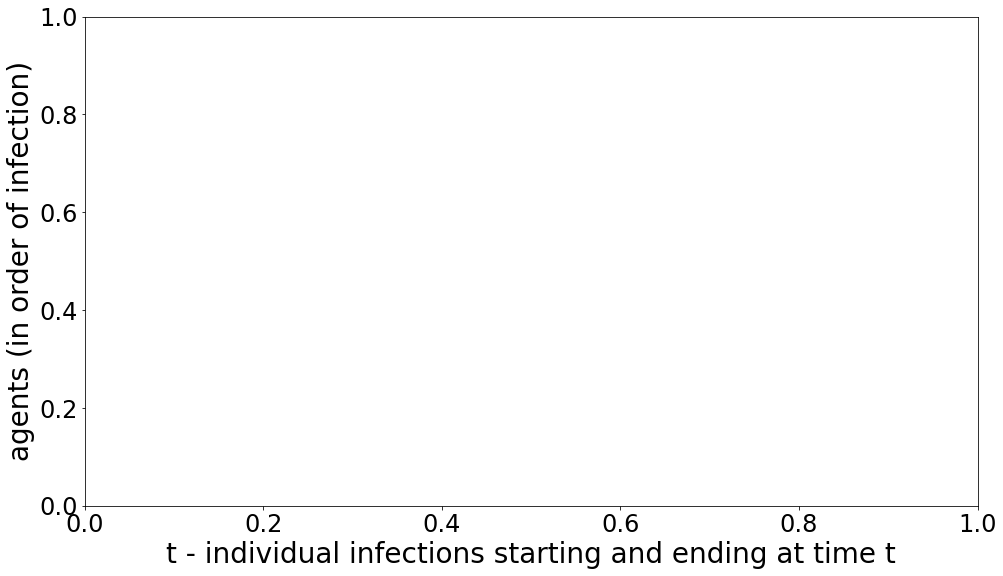

In [6]:
fig=plt.figure()
ax = fig.add_subplot()
ax.set_xlabel("t - individual infections starting and ending at time t",fontdict = font)
ax.set_ylabel("agents (in order of infection)",fontdict = font)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)


for i in range(rec.shape[0]):
    #vertical line
    lineS='-'
    if rec[i,7] >= 413: plt.plot([rec[i,7],rec[i,7]],[rec[i,1],rec[i,5]],lw=3,color=colors.color(rec[i,2]))
    #horizontal lines: incubation (dotted line); symptomatic (solid line); 
    #                  asymptomatic (dashed line); 
    lineS=':'
    if rec[i,7] >= 413: plt.plot([rec[i,7],rec[i,8]],[rec[i,5],rec[i,5]],'k:',lw=rec[i,4],
             color=colors.color(rec[i,6]))
    lineS='-'
    if rec[i,10] == 2: lineS='--'
    if rec[i,7] >= 413: plt.plot([rec[i,8],rec[i,9]],[rec[i,5],rec[i,5]],lineS,lw=rec[i,4],
             color=colors.color(rec[i,6]))